#Deri Andika Zandra 
09011281823033

#Perdiksi atau perkiraan cuaca di autralia menggunakan metode Support Vector Machine (SVM)

*Support vector mechine merupakan suatu teknik atau metode untuk memprediksi baik dalam kasus klarifikasi ataupun regresi*

**Tool Import**

In [1]:
import pandas
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import os


1.   Pandas --> merupakan liblary python yang fokus untuk proses analisa data
2.  matplotib --> merupakan liblary python yang fokus pada visualisasi data seperti membuat plot grafik
3.  Numpy -->merupakan liblary python yang fokus pada sciencitific computing
4.  sklearn --> Merupakan modul untuk bahasa pemograman
python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

**Import data Sheat**

In [15]:

df1 = pandas.read_csv("weatherAUS.csv")

Import data Sheat di sini menggunakan data daerah california_housing di australia

In [16]:
df1.describe(include="all")
df1['MinTemp'] = df1['MinTemp'].fillna((df1['MinTemp'].mean()))
df1['MaxTemp'] = df1['MaxTemp'].fillna((df1['MaxTemp'].mean()))
df1['Rainfall'] = df1['Rainfall'].fillna((df1['Rainfall'].mean()))
df1['Evaporation'] = df1['Evaporation'].fillna((df1['Evaporation'].mean()))
df1['Sunshine'] = df1['Sunshine'].fillna((df1['Sunshine'].mean()))
df1['WindGustSpeed'] = df1['WindGustSpeed'].fillna((df1['WindGustSpeed'].mean()))
df1['WindSpeed9am'] = df1['WindSpeed9am'].fillna((df1['WindSpeed9am'].mean()))
df1['WindSpeed3pm'] = df1['WindSpeed3pm'].fillna((df1['WindSpeed3pm'].mean()))
df1['Humidity9am'] = df1['Humidity9am'].fillna((df1['Humidity9am'].mean()))
df1['Humidity3pm'] = df1['Humidity3pm'].fillna((df1['Humidity3pm'].mean()))
df1['Pressure9am'] = df1['Pressure9am'].fillna((df1['Pressure9am'].mean()))
df1['Pressure3pm'] = df1['Pressure3pm'].fillna((df1['Pressure3pm'].mean()))
df1['Cloud9am'] = df1['Cloud9am'].fillna((df1['Cloud9am'].mean()))
df1['Cloud3pm'] = df1['Cloud3pm'].fillna((df1['Cloud3pm'].mean()))
df1['Temp3pm'] = df1['Temp3pm'].fillna((df1['Temp3pm'].mean()))
df1['Temp9am'] = df1['Temp9am'].fillna((df1['Temp9am'].mean()))
df1['RISK_MM'] = df1['RISK_MM'].fillna((df1['RISK_MM'].mean()))
df1['WindGustDir'] = df1['WindGustDir'].fillna("W")
df1['WindDir9am'] = df1['WindDir9am'].fillna("N")
df1['WindDir3pm'] = df1['WindDir3pm'].fillna("SE")
df1['RainToday'] = df1['RainToday'].fillna("No")
df1 = df1.drop(["Date", "Location", "RISK_MM"], axis=1)
df1 = df1.drop('WindGustDir', axis=1)
df1 = df1.drop('WindDir3pm', axis=1)
df1 = df1.drop('WindDir9am', axis=1)
df1 = df1.drop('RainToday', axis=1)
df1['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [17]:
num_cols = df1.columns[df1.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

z = np.abs(stats.zscore(df1[num_cols]))
print(z)
df1 = df1[(z < 3).all(axis=1)]
print(df1.shape)

[[0.18995446 0.04596425 0.20775676 ... 0.0135208  0.01641234 0.53755075]
 [0.74917416 0.26347957 0.2789887  ... 0.03283169 0.38027381 0.53755075]
 [0.11169374 0.34787335 0.2789887  ... 0.61996332 0.22017476 0.53755075]
 ...
 [1.34395563 0.29161083 0.2789887  ... 0.94057075 0.40938273 0.53755075]
 [1.06221704 0.51666089 0.2789887  ... 0.69335743 0.64225407 0.53755075]
 [0.68656559 0.53072651 0.2789887  ... 0.29163579 0.62769961 0.53755075]]
(133601, 17)


Memperkirakan hujan atau tidaknya pada suatu wilayah meggunakan code merah dan biru

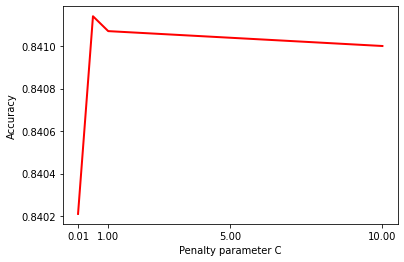

In [18]:
df2 = df1.sample(n=20000, random_state=1)
x = df2.drop(['RainTomorrow'], axis=1)
y = df2['RainTomorrow']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.7, random_state=1, shuffle=True)
std_Xtrain1 = preprocessing.scale(x_train1)
std_Xtest1 = preprocessing.scale(x_test1)
scores = []
C = [0.01, 0.5, 1, 10]
for i in C:
    clf1 = SVC(kernel='linear', random_state=1, C=i)
    cv1 = KFold(n_splits=5, random_state=1, shuffle=True)
    scr1 = cross_val_score(clf1, std_Xtrain1, y_train1, cv=cv1)
    scores.append(round(scr1.mean(), 5))
plt.figure()

plt.plot(C, scores, color='red',
         lw=2)
plt.xticks([0.01, 1, 5, 10])
plt.xlabel("Penalty parameter C")
plt.ylabel("Accuracy")
plt.show()

In [21]:
#RBF Kernel

Perkiraan akurasi ketepatan pada metode SVM 

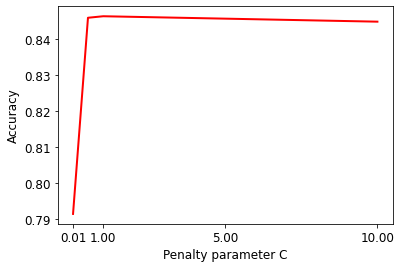

[[4546  167]
 [ 746  541]]
0.8478


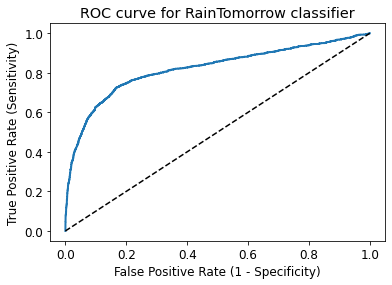

0.82043

In [22]:
C = [0.01, 0.5, 1, 10]
scores2 = []
for i in C:
    clf2 = SVC(kernel='rbf', random_state=1, C=i, gamma='auto')
    cv2 = KFold(n_splits=5, random_state=1, shuffle=True)
    scr2 = cross_val_score(clf2, std_Xtrain1, y_train1, cv=cv2)

    scores2.append(round(scr2.mean(), 5))
plt.figure()

plt.plot(C, scores2, color='red',
         lw=2)
plt.xticks([0.01, 1, 5, 10])
plt.xlabel("Penalty parameter C")
plt.ylabel("Accuracy")
plt.show()
svclassifier2 = SVC(kernel='rbf', random_state=1, gamma='auto', C=1, probability=True)
svclassifier2.fit(std_Xtrain1, y_train1)
ypred2 = svclassifier2.predict(std_Xtest1)
print(confusion_matrix(y_test1, ypred2))
# print(classification_report(y_test,ypred))
print(round(accuracy_score(y_test1, ypred2), 4))
prob3 = svclassifier2.predict_proba(std_Xtest1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, prob3, pos_label=1)
tpr
plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()
ROC_AUC = roc_auc_score(y_test1, prob3)
round(ROC_AUC, 5)

In [23]:
#Decision Tree

Perkiraan validasi lebih rendah daripada training akurasi terdapat pada tabel output

[[4079  634]
 [ 676  611]]
78.16667
0.78214
0.82886
0.82943
0.83371
0.83464
0.834
0.83143
0.82829
0.82629
0.81914
0.81371
0.80757
0.8085
0.80064
0.79771
0.79243
0.82886
0.83407
0.83871
0.84293
0.84843
0.85457
0.86336
0.87493
0.88693
0.90107
0.91414
0.92643
0.93736
0.95
0.95764


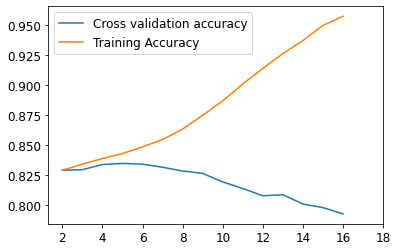

In [24]:
clf_entropy = DecisionTreeClassifier(
    criterion="entropy", random_state=10)
clf_entropy.fit(std_Xtrain1, y_train1)
y_pred = clf_entropy.predict(std_Xtest1)
print(confusion_matrix(y_test1, y_pred))
print(round(accuracy_score(y_test1, y_pred) * 100, 5))
clf_cv = DecisionTreeClassifier(criterion="entropy", random_state=10)
cv = KFold(n_splits=10, random_state=10, shuffle=True)
scr = cross_val_score(clf_cv, std_Xtrain1, y_train1, cv=cv)
print(round(scr.mean(), 5))
depth = list(range(2, 16 + 1, 1))
dpth_scores = []
for i in depth:
    clf_cv = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=i)
    cv = KFold(n_splits=5, random_state=10, shuffle=True)
    scr = cross_val_score(clf_cv, std_Xtrain1, y_train1, cv=cv)
    print(round(scr.mean(), 5))
    dpth_scores.append(round(scr.mean(), 5))
dpth_scores1 = []
for i in depth:
    clf_train = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=i)
    clf_train.fit(std_Xtrain1, y_train1)
    y_pred1 = clf_train.predict(std_Xtrain1)
    print(round(accuracy_score(y_train1, y_pred1), 5))
    dpth_scores1.append(round(accuracy_score(y_train1, y_pred1), 5))
plt.figure()
plt.plot(depth, dpth_scores)
plt.plot(depth, dpth_scores1)

plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18])
plt.legend(["Cross validation accuracy", "Training Accuracy"])
plt.show()


Kurva ROC untuk pengklarifikasian hujan besok harinya masih sangatlah tinggi terlihat pada output table

[[4510  203]
 [ 803  484]]
83.23333
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4713
           1       0.70      0.38      0.49      1287

    accuracy                           0.83      6000
   macro avg       0.78      0.67      0.70      6000
weighted avg       0.82      0.83      0.81      6000



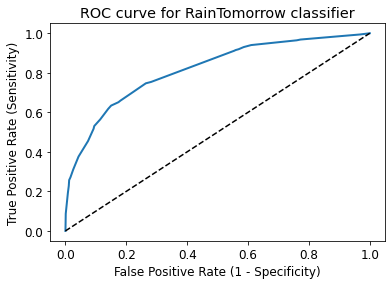

0.81558

In [25]:
clf_entropy = DecisionTreeClassifier(
    criterion="entropy", random_state=10, max_depth=5)
clf_entropy.fit(std_Xtrain1, y_train1)
y_pred = clf_entropy.predict(std_Xtest1)
print(confusion_matrix(y_test1, y_pred))
print(round(accuracy_score(y_test1, y_pred) * 100, 5))
print(classification_report(y_test1, y_pred))
probs1 = clf_entropy.predict_proba(std_Xtest1)[:, 1]

fpr, tpr, th = roc_curve(y_test1, probs1, pos_label=1)
plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()
ROC_AUC = roc_auc_score(y_test1, probs1)
round(ROC_AUC, 5)

In [26]:
#Gradient Boosting

Peningkatan gradient pada kurva yang di tampilkan 

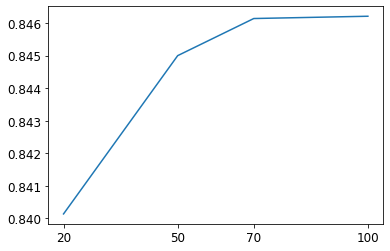

0.84214
0.84529
0.845
0.84457
0.8415
0.83407
0.83136


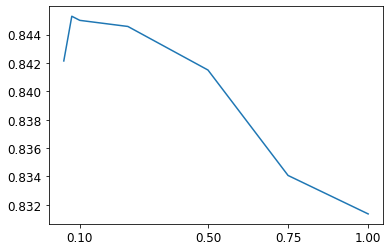

0.84321
0.84529
0.84743
0.84657
0.84829
0.844
0.84386
0.84107
0.83979
0.84007
0.84557
0.85193
0.8605
0.87257
0.88943
0.91164
0.938
0.95764
0.97471
0.98664


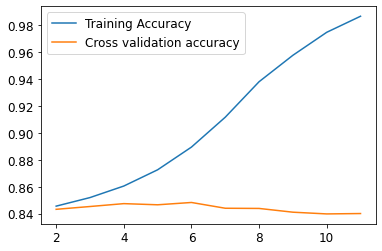

[[4525  188]
 [ 723  564]]
84.81667
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4713
           1       0.75      0.44      0.55      1287

    accuracy                           0.85      6000
   macro avg       0.81      0.70      0.73      6000
weighted avg       0.84      0.85      0.83      6000



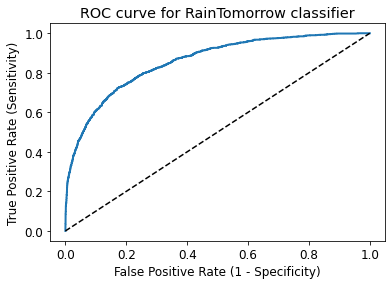

0.85725

In [27]:
n_est = [20, 50, 70, 100]
est_scores = []
for n in n_est:
    gb_clf = GradientBoostingClassifier(random_state=10, n_estimators=n)
    cv = KFold(n_splits=5, random_state=10, shuffle=True)
    scr = cross_val_score(gb_clf, std_Xtrain1, y_train1, cv=cv)
    est_scores.append(round(scr.mean(), 5))
import matplotlib.pyplot as plt

plt.figure()
plt.plot(n_est, est_scores)
plt.xticks([20, 50, 70, 100])

plt.show()
alpha = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
alpha_scores = []
for a in alpha:
    gb_clf = GradientBoostingClassifier(random_state=10, n_estimators=50, learning_rate=a)
    cv = KFold(n_splits=5, random_state=10, shuffle=True)
    scr = cross_val_score(gb_clf, std_Xtrain1, y_train1, cv=cv)
    print(round(scr.mean(), 5))
    alpha_scores.append(round(scr.mean(), 5))
plt.figure()
plt.plot(alpha, alpha_scores)
plt.xticks([0.1, 0.5, 0.75, 1])
plt.show()
depth = list(range(2, 11 + 1, 1))
dpth_scores1 = []
for i in depth:
    gb_clf = GradientBoostingClassifier(random_state=10, n_estimators=50, learning_rate=0.075, max_depth=i)
    cv = KFold(n_splits=5, random_state=10, shuffle=True)
    scr = cross_val_score(gb_clf, std_Xtrain1, y_train1, cv=cv)
    print(round(scr.mean(), 5))
    dpth_scores1.append(round(scr.mean(), 5))
depth = list(range(2, 11 + 1, 1))
dpth_scores = []
for i in depth:
    gb_clf = GradientBoostingClassifier(random_state=10, n_estimators=50, learning_rate=0.075, max_depth=i)
    gb_clf.fit(std_Xtrain1, y_train1)
    print(round(gb_clf.score(std_Xtrain1, y_train1), 5))
    dpth_scores.append(round(gb_clf.score(std_Xtrain1, y_train1), 5))
plt.figure()
plt.plot(depth, dpth_scores)
plt.plot(depth, dpth_scores1)
plt.xticks([2, 4, 6, 8, 10])
plt.legend(["Training Accuracy", "Cross validation accuracy"])
plt.show()
gb_clf = GradientBoostingClassifier(random_state=10, n_estimators=50, learning_rate=0.075, max_depth=4)
gb_clf.fit(std_Xtrain1, y_train1)
y_pred = gb_clf.predict(std_Xtest1)
print(confusion_matrix(y_test1, y_pred))
print(round(accuracy_score(y_test1, y_pred) * 100, 5))
print(classification_report(y_test1, y_pred))
probs1 = gb_clf.predict_proba(std_Xtest1)[:, 1]

fpr, tpr, th = roc_curve(y_test1, probs1, pos_label=1)
plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()
ROC_AUC = roc_auc_score(y_test1, probs1)
round(ROC_AUC, 5)

In [28]:
# Bar charts for second dataset

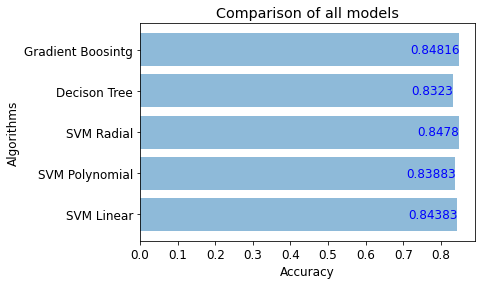

In [29]:
objects = ('SVM Linear', 'SVM Polynomial', 'SVM Radial', 'Decison Tree', 'Gradient Boosintg')
y_pos = np.arange(len(objects))
performance = [0.84383, 0.83883, 0.8478, 0.8323, 0.84816]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
plt.title('Comparison of all models')
for i, v in enumerate(performance):
    plt.text(v + 0.001, i, str(v), color='blue', ha='right', va='center')
plt.show()


Pada tabelm kita dapat menganalisis perbandingan model svm Radial mempunyai accuracy yang tinggi dan accurasy yang rendah terdapat decision tree

In [30]:
# Roc curves for second dataset

In [31]:
svclassifier = SVC(kernel='linear', probability=True, random_state=1, C=0.5)
svclassifier.fit(std_Xtrain1, y_train1)
prob1 = svclassifier.predict_proba(std_Xtest1)[:, 1]

In [32]:
# Polynomial kernel

In [34]:
svclassifier1 = SVC(kernel='poly', degree=3, probability=True)
svclassifier1.fit(std_Xtrain1, y_train1)
prob2 = svclassifier1.predict_proba(std_Xtest1)[:, 1]

In [35]:
# Sigmoid

In [36]:
svclassifier2 = SVC(kernel='rbf', probability=True, C=10)
svclassifier2.fit(std_Xtrain1, y_train1)
prob3 = svclassifier2.predict_proba(std_Xtest1)[:, 1]

In [37]:
# Depth=7

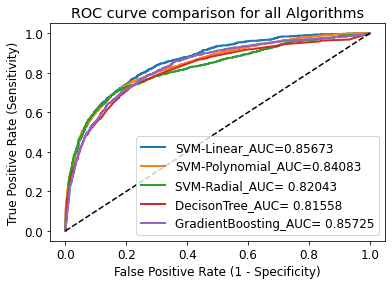

In [38]:
clf_entropy = DecisionTreeClassifier(
    criterion="entropy", random_state=10, max_depth=7)
clf_entropy.fit(std_Xtrain1, y_train1)
prob4 = clf_entropy.predict_proba(std_Xtest1)[:, 1]

gb_clf = GradientBoostingClassifier(random_state=10, n_estimators=100, learning_rate=0.75, max_depth=3)
gb_clf.fit(std_Xtrain1, y_train1)
prob5 = gb_clf.predict_proba(std_Xtest1)[:, 1]
fpr1, tpr1, th1 = roc_curve(y_test1, prob1, pos_label=1)
fpr2, tpr2, th2 = roc_curve(y_test1, prob2, pos_label=1)
fpr3, tpr3, th3 = roc_curve(y_test1, prob3, pos_label=1)
fpr4, tpr4, th4 = roc_curve(y_test1, prob4, pos_label=1)
fpr5, tpr5, th5 = roc_curve(y_test1, prob5, pos_label=1)
plt.figure(figsize=(6, 4))
plt.plot(fpr1, tpr1, linewidth=2)
plt.plot(fpr2, tpr2, linewidth=2)
plt.plot(fpr3, tpr3, linewidth=2)
plt.plot(fpr4, tpr4, linewidth=2)
plt.plot(fpr5, tpr5, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve comparison for all Algorithms')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(
    ["SVM-Linear_AUC=0.85673", "SVM-Polynomial_AUC=0.84083", "SVM-Radial_AUC= 0.82043", "DecisonTree_AUC= 0.81558",
     "GradientBoosting_AUC= 0.85725"])

plt.show()


Pada curva ROC kita dapat menganalisis positife rate true masih mendominasi dapat dilihat dari table output program

In [39]:
# No. of training size Vs accuracy plots

0.80333
0.83029
0.823
0.84014
0.83289
0.83762
0.839
0.84279


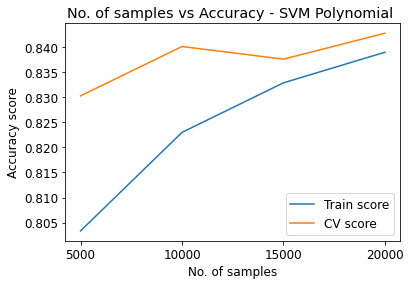

In [40]:
n = [5000, 10000, 15000, 20000]
scores_tr = []
scores_cv = []
for i in n:
    df2 = df1.sample(n=i, random_state=1)
    x = df2.drop(['RainTomorrow'], axis=1)

    y = df2['RainTomorrow']
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.7, random_state=1, shuffle=True)
    # scaler=preprocessing.MinMaxScaler()
    # scaler.fit(x)
    std_Xtrain1 = preprocessing.scale(x_train1)
    std_Xtest1 = preprocessing.scale(x_test1)
    svclassifier = SVC(kernel='poly', degree=3, random_state=1, gamma="auto")
    svclassifier.fit(std_Xtrain1, y_train1)

    print(round(svclassifier.score(std_Xtest1, y_test1), 5))
    scores_tr.append(round(svclassifier.score(std_Xtest1, y_test1), 5))

    clf = SVC(kernel='poly', degree=3, random_state=1, gamma="auto")
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scr = cross_val_score(clf, std_Xtrain1, y_train1, cv=cv)
    print(round(scr.mean(), 5))
    scores_cv.append(round(scr.mean(), 5))


plt.figure()
plt.plot(n, scores_tr)
plt.plot(n, scores_cv)
plt.xticks(n)
plt.title("No. of samples vs Accuracy - SVM Polynomial ")
plt.xlabel("No. of samples")
plt.ylabel("Accuracy score")
plt.legend(["Train score", "CV score"])
plt.show()


Pada curva Jumlah sample dan accuracy SVM polymial cv score memiliki akurasi score yang cukup tinggi

0.82371
0.83771
0.82914
0.83464


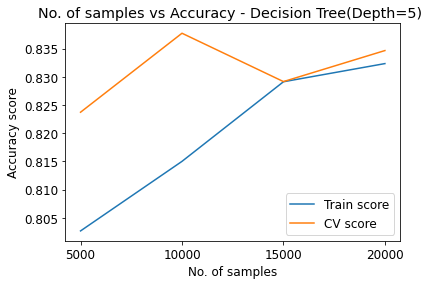

In [41]:
scores_tr1 = []
scores_cv1 = []
for i in n:
    df2 = df1.sample(n=i, random_state=1)
    x = df2.drop(['RainTomorrow'], axis=1)

    y = df2['RainTomorrow']
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.7, random_state=1, shuffle=True)
    # scaler=preprocessing.MinMaxScaler()
    # scaler.fit(x)
    std_Xtrain1 = preprocessing.scale(x_train1)
    std_Xtest1 = preprocessing.scale(x_test1)
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=10, max_depth=5)
    clf_entropy.fit(std_Xtrain1, y_train1)

    scores_tr1.append(round(clf_entropy.score(std_Xtest1, y_test1), 5))

    clf_cv = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=5)
    cv = KFold(n_splits=5, random_state=10, shuffle=True)
    scr = cross_val_score(clf_cv, std_Xtrain1, y_train1, cv=cv)
    print(round(scr.mean(), 5))
    scores_cv1.append(round(scr.mean(), 5))

plt.figure()
plt.plot(n, scores_tr1)
plt.plot(n, scores_cv1)
plt.xticks(n)
plt.title("No. of samples vs Accuracy - Decision Tree(Depth=5) ")
plt.xlabel("No. of samples")
plt.ylabel("Accuracy score")
plt.legend(["Train score", "CV score"])
plt.show()


Pada curva di atas terlihat cv score mulai hampir mendekati train code pada depth=5

0.814
0.83571
0.8306666666666667
0.84371
0.8411111111111111
0.84133
0.8481666666666666
0.84743


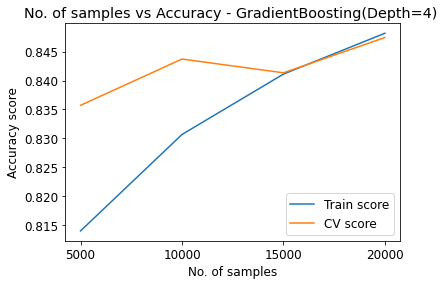

In [42]:
scores_tr2 = []
scores_cv2 = []
for i in n:
    df2 = df1.sample(n=i, random_state=1)
    x = df2.drop(['RainTomorrow'], axis=1)

    y = df2['RainTomorrow']
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.7, random_state=1, shuffle=True)
    std_Xtrain1 = preprocessing.scale(x_train1)
    std_Xtest1 = preprocessing.scale(x_test1)
    gb_clf = GradientBoostingClassifier(random_state=10, n_estimators=50, learning_rate=0.075, max_depth=4)
    gb_clf.fit(std_Xtrain1, y_train1)
    print(gb_clf.score(std_Xtest1, y_test1))
    scores_tr2.append(round(gb_clf.score(std_Xtest1, y_test1), 5))

    gb_clf1 = GradientBoostingClassifier(random_state=10, n_estimators=50, learning_rate=0.075, max_depth=4)
    cv = KFold(n_splits=5, random_state=10, shuffle=True)
    scr = cross_val_score(gb_clf1, std_Xtrain1, y_train1, cv=cv)
    print(round(scr.mean(), 5))
    scores_cv2.append(round(scr.mean(), 5))

plt.figure()
plt.plot(n, scores_tr2)
plt.plot(n, scores_cv2)
plt.xticks(n)
plt.title("No. of samples vs Accuracy - GradientBoosting(Depth=4) ")
plt.xlabel("No. of samples")
plt.ylabel("Accuracy score")
plt.legend(["Train score", "CV score"])
plt.show()


Pada tabel sample dan accuracy gradientboosting depth=4 cv score mulai sejajar degan train score dan ini menandakan curah hujan mulai tinggi pada daerah autralia

# Referensi 

https://github.com/manikandan1408/SVM-Decision-Tree-for-SGEMM-Kernel-and-Australia-Weather-Prediction